# Análisis para generar los KPIs

### Importando las librerías a utilizar.

In [4]:
import pandas as pd 
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

### Cargando el dataset

In [7]:
# Cargar los datos desde el archivo.
data = pd.read_csv("data_final.csv", index_col= False, sep= ",", header= 0)

# Normalizando 
data['fecha'] = pd.to_datetime(data['fecha'])
data['all_aboard'] = data['all_aboard'].replace('?', np.nan).astype(float).astype('Int64')
data['cantidad de fallecidos'] = data['cantidad de fallecidos'].replace('?', np.nan).astype(float).astype('Int64')
data['PASAJEROS A BORDO'] = data['PASAJEROS A BORDO'].replace('?', np.nan).astype(float).astype('Int64')

### KPI-1: Tasa de mortalidad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15208\3551793891.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mortalidad_anual = data.groupby('Year')['cantidad de fallecidos', 'all_aboard'].sum()


<AxesSubplot: title={'center': 'Tasa de Mortalidad Anual'}, xlabel='Año', ylabel='Tasa de Mortalidad'>

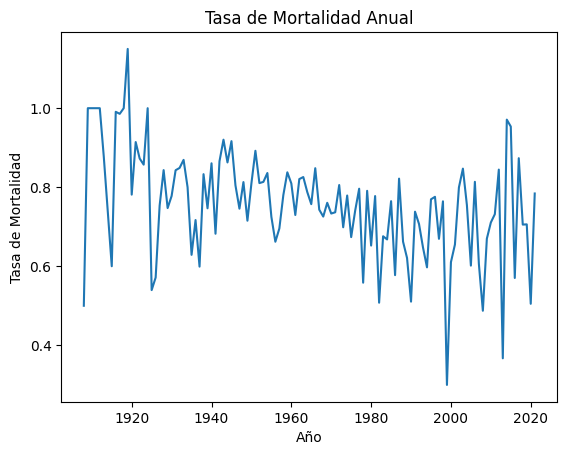

In [9]:
# Calcular la tasa de mortalidad anual
data['fecha'] = pd.to_datetime(data['fecha'])  # Convertir la columna 'Fecha' a tipo datetime si aún no lo está
data['Year'] = data['fecha'].dt.year  # Extraer el año de la columna 'Fecha'

# Agrupar los datos por año y calcular la tasa de mortalidad
mortalidad_anual = data.groupby('Year')['cantidad de fallecidos', 'all_aboard'].sum()
mortalidad_anual['Tasa de Mortalidad'] = mortalidad_anual['cantidad de fallecidos'] / mortalidad_anual['all_aboard']

# Visualizar la tasa de mortalidad anual
mortalidad_anual['Tasa de Mortalidad'].plot(kind='line', xlabel='Año', ylabel='Tasa de Mortalidad', title='Tasa de Mortalidad Anual')

### KPI-2: Número de vidas salvadas a nivel anual.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15208\115712341.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



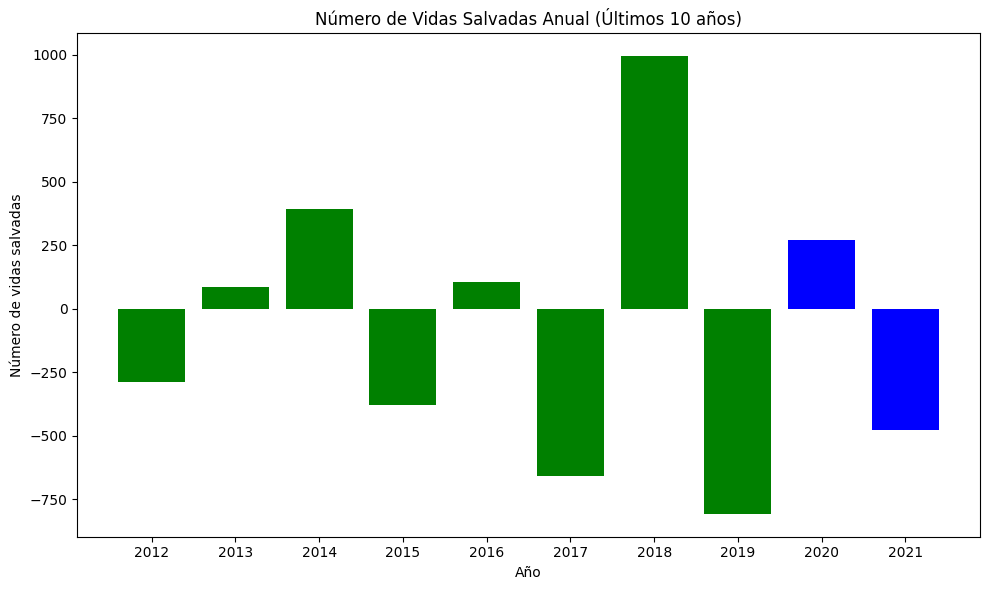

In [65]:
# Preparar los datos y calcular el número de vidas salvadas anualmente
data['Año'] = pd.to_datetime(data['fecha']).dt.year
vidas_salvadas_anual = data.groupby('Año')['cantidad de fallecidos', 'all_aboard'].sum()
vidas_salvadas_anual['Vidas Salvadas'] = vidas_salvadas_anual['all_aboard'].diff().fillna(0)

# Filtrar los últimos 10 años
ultimo_ano = vidas_salvadas_anual.index.max()
ultimos_10_anos = vidas_salvadas_anual.loc[ultimo_ano-9:ultimo_ano]

# Calcular la frecuencia de los últimos 10 años
frecuencia_ultimos_10_anos = data[data['Año'].isin(ultimos_10_anos.index)]['Año'].value_counts().reset_index()
frecuencia_ultimos_10_anos.columns = ['Año', 'Frecuencia']

# Combinar la frecuencia de los últimos 10 años con los datos de vidas salvadas por año
vidas_salvadas_ultimos_10_anos = ultimos_10_anos.merge(frecuencia_ultimos_10_anos, on='Año', how='left')

# Ordenar el DataFrame por el año de manera ascendente
vidas_salvadas_ultimos_10_anos.sort_values('Año', ascending=True, inplace=True)

# Definir una lista de colores para las barras
colores = ['green'] * (len(vidas_salvadas_ultimos_10_anos)-2) + ['blue', 'blue']

# Generar el gráfico de número de vidas salvadas anual con colores personalizados
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Obtener los años y el número de vidas salvadas correspondiente
años = vidas_salvadas_ultimos_10_anos['Año']
num_vidas_salvadas = vidas_salvadas_ultimos_10_anos['Vidas Salvadas']

# Obtener el índice para el rango de barras
rango_barras = np.arange(len(años))

plt.bar(rango_barras, num_vidas_salvadas, color=colores)
plt.xticks(rango_barras, años)  # Mostrar los años en el eje x

plt.title('Número de Vidas Salvadas Anual (Últimos 10 años)')
plt.xlabel('Año')
plt.ylabel('Número de vidas salvadas')

plt.tight_layout()
plt.show()


### KPI-3: Tasa de mortalidad promedia por operador

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15208\4098785717.py:12: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



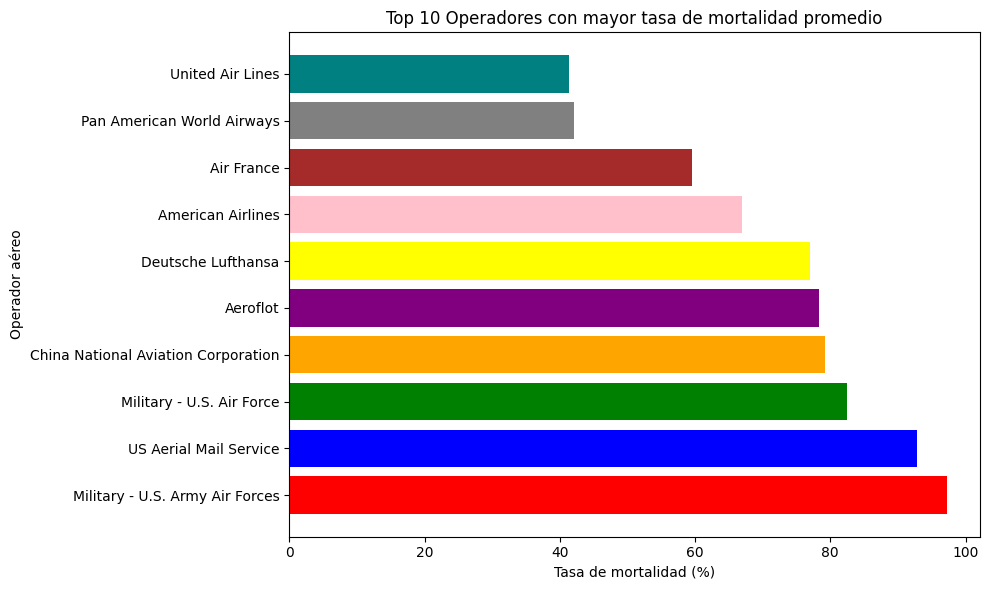

In [42]:
# Calcular la frecuencia de cada operador
frecuencia_operador = data['OperadOR'].value_counts().reset_index()
frecuencia_operador.columns = ['OperadOR', 'Frecuencia']

# Obtener el top 10 de operadores con mayor frecuencia
top_operadores_frecuencia = frecuencia_operador.head(10)

# Filtrar los datos por los operadores con mayor frecuencia
data_top_operadores = data[data['OperadOR'].isin(top_operadores_frecuencia['OperadOR'])]

# Calcular la tasa de mortalidad promedio por operador
mortalidad_por_operador = data_top_operadores.groupby('OperadOR')['cantidad de fallecidos', 'all_aboard'].mean()
mortalidad_por_operador['Tasa de Mortalidad'] = (mortalidad_por_operador['cantidad de fallecidos'] / mortalidad_por_operador['all_aboard']) * 100

# Reemplazar valores infinitos por NaN
mortalidad_por_operador.replace([np.inf, -np.inf], np.nan, inplace=True)

# Combinar la frecuencia con los datos de mortalidad por operador
mortalidad_por_operador = mortalidad_por_operador.merge(top_operadores_frecuencia, on='OperadOR', how='left')

# Eliminar filas con valores NaN en la columna 'Tasa de Mortalidad'
mortalidad_por_operador = mortalidad_por_operador.dropna(subset=['Tasa de Mortalidad'])

# Reiniciar los índices
mortalidad_por_operador = mortalidad_por_operador.reset_index()

# Definir una lista de colores para las barras
colores = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'teal']

# Ordenar el DataFrame por la columna 'Tasa de Mortalidad' de manera descendente
mortalidad_por_operador.sort_values('Tasa de Mortalidad', ascending=False, inplace=True)

# Generar el gráfico de barras horizontales con colores personalizados
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Obtener los nombres de los operadores y la tasa de mortalidad correspondiente
nombres_operadores = mortalidad_por_operador['OperadOR']
tasa_mortalidad = mortalidad_por_operador['Tasa de Mortalidad']

# Obtener el índice para el rango de barras
rango_barras = np.arange(len(nombres_operadores))

plt.barh(rango_barras, tasa_mortalidad, color=colores)
plt.yticks(rango_barras, nombres_operadores)  # Mostrar los nombres de los operadores en el eje y

plt.title('Top 10 Operadores con mayor tasa de mortalidad promedio')
plt.xlabel('Tasa de mortalidad (%)')
plt.ylabel('Operador aéreo')

plt.tight_layout()
plt.show()


### KPI-4: Tasa de mortalidad por ruta

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15208\3354045573.py:12: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



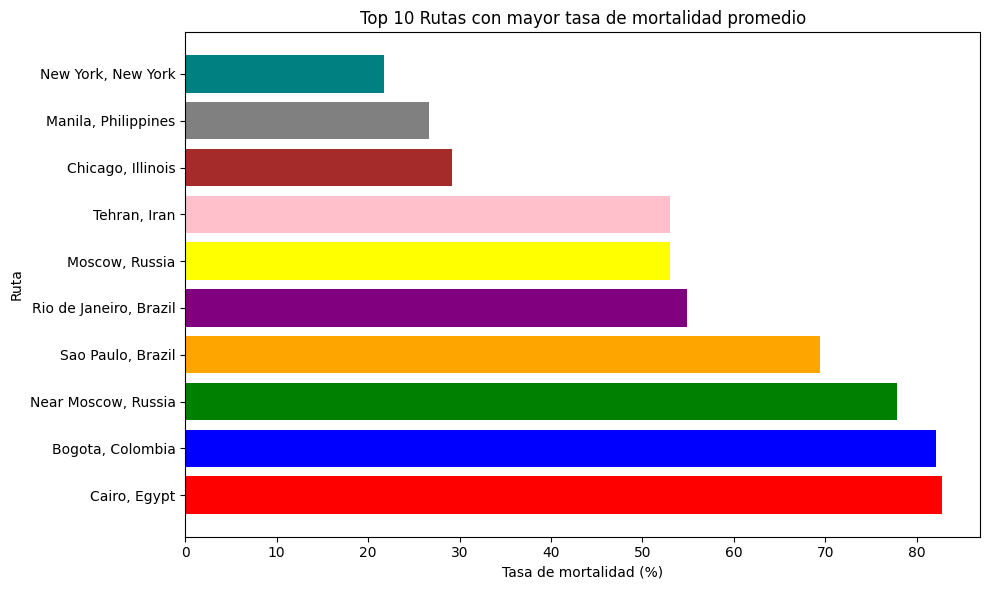

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15208\3354045573.py:56: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
# Calcular la frecuencia de cada ruta
frecuencia_ruta = data['Ruta'].value_counts().reset_index()
frecuencia_ruta.columns = ['Ruta', 'Frecuencia']

# Obtener las 10 rutas con mayor frecuencia
top_rutas_frecuencia = frecuencia_ruta.head(10)

# Filtrar los datos por las rutas con mayor frecuencia
data_top_rutas = data[data['Ruta'].isin(top_rutas_frecuencia['Ruta'])]

# Calcular la tasa de mortalidad promedio por ruta
mortalidad_por_ruta = data_top_rutas.groupby('Ruta')['cantidad de fallecidos', 'all_aboard'].mean()
mortalidad_por_ruta['Tasa de Mortalidad'] = (mortalidad_por_ruta['cantidad de fallecidos'] / mortalidad_por_ruta['all_aboard']) * 100

# Reemplazar valores infinitos por NaN
mortalidad_por_ruta.replace([np.inf, -np.inf], np.nan, inplace=True)

# Combinar la frecuencia con los datos de mortalidad por ruta
mortalidad_por_ruta = mortalidad_por_ruta.merge(top_rutas_frecuencia, on='Ruta', how='left')

# Eliminar filas con valores NaN en la columna 'Tasa de Mortalidad'
mortalidad_por_ruta = mortalidad_por_ruta.dropna(subset=['Tasa de Mortalidad'])

# Reiniciar los índices
mortalidad_por_ruta = mortalidad_por_ruta.reset_index()

# Definir una lista de colores para las barras
colores = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'teal']

# Ordenar el DataFrame por la columna 'Tasa de Mortalidad' de manera descendente
mortalidad_por_ruta.sort_values('Tasa de Mortalidad', ascending=False, inplace=True)

# Generar el gráfico de barras horizontales con colores personalizados
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Obtener los nombres de las rutas y la tasa de mortalidad correspondiente
nombres_rutas = mortalidad_por_ruta['Ruta']
tasa_mortalidad = mortalidad_por_ruta['Tasa de Mortalidad']

# Obtener el índice para el rango de barras
rango_barras = np.arange(len(nombres_rutas))

plt.barh(rango_barras, tasa_mortalidad, color=colores)
plt.yticks(rango_barras, nombres_rutas)  # Mostrar los nombres de las rutas en el eje y

plt.title('Top 10 Rutas con mayor tasa de mortalidad promedio')
plt.xlabel('Tasa de mortalidad (%)')
plt.ylabel('Ruta')

plt.tight_layout()
plt.show()

import plotly.express as px

# Calcular la tasa de mortalidad promedio por ruta utilizando los datos filtrados
mortalidad_por_ruta = data_top_rutas.groupby('Ruta')['cantidad de fallecidos', 'all_aboard'].mean()
mortalidad_por_ruta['Tasa de Mortalidad'] = (mortalidad_por_ruta['cantidad de fallecidos'] / mortalidad_por_ruta['all_aboard']) * 100

# Reemplazar valores infinitos por NaN
mortalidad_por_ruta.replace([np.inf, -np.inf], np.nan, inplace=True)

# Combinar la frecuencia con los datos de mortalidad por ruta
mortalidad_por_ruta = mortalidad_por_ruta.merge(top_rutas_frecuencia, on='Ruta', how='left')

# Eliminar filas con valores NaN en la columna 'Tasa de Mortalidad'
mortalidad_por_ruta = mortalidad_por_ruta.dropna(subset=['Tasa de Mortalidad'])

# Ordenar el DataFrame por la columna 'Tasa de Mortalidad' de manera descendente
mortalidad_por_ruta.sort_values('Tasa de Mortalidad', ascending=False, inplace=True)

# Crear un gráfico de mapa interactivo
fig = px.choropleth(mortalidad_por_ruta,
                    locations='Ruta',
                    locationmode='country names',
                    color='Tasa de Mortalidad',
                    color_continuous_scale='Reds',
                    labels={'Tasa de Mortalidad': 'Tasa de mortalidad (%)'},
                    title='Tasa de mortalidad promedio por ruta (Top 10)')

# Configurar el diseño del gráfico
fig.update_layout(geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='equirectangular'))

# Mostrar el gráfico interactivo
fig.show()
